In [4]:
import json
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

plt.rcParams['figure.figsize'] = [24, 12]

In [5]:
with open("../../recordings/v1.0.0-test.json") as file:
    output_area_polygons = json.load(file)
print(output_area_polygons.keys())

dict_keys(['OutputArea', 'All', 'PublicTransport'])


In [6]:
output_areas = set(output_area_polygons["OutputArea"].keys())
output_area_df = None
for area in output_area_polygons["OutputArea"]:
    records = []
    for record in output_area_polygons["OutputArea"][area]:
        record["code"] = area
        records.append(record)
    if output_area_df is None:
        output_area_df = pd.DataFrame(records)
    else:
        output_area_df = pd.concat([output_area_df, pd.DataFrame(records)])

#output_area_df.append()
#output_areas
output_area_df["code"].value_counts()

E00067302    861
E00067747    861
E00067431    861
E00067687    861
E00067300    861
            ... 
E00067550    666
E00067344    666
E00067692    666
E00067407    666
E00170149    666
Name: code, Length: 637, dtype: int64

In [7]:
output_area_df.head(5)

,time_step,susceptible,exposed,infected,recovered,vaccinated,code
0,1,256,0,0,0,0,E00067302
1,2,256,0,0,0,0,E00067302
2,3,256,0,0,0,0,E00067302
3,4,256,0,0,0,0,E00067302
4,5,256,0,0,0,0,E00067302


In [7]:
def extract_stats(data) -> pd.DataFrame:
    max_size = len(data) + 1
    susceptible = np.empty(max_size)
    exposed = np.empty(max_size)
    infected = np.empty(max_size)
    removed = np.empty(max_size)
    vaccinated = np.empty(max_size)
    for entry in data:
        susceptible[entry["time_step"]] = entry["susceptible"]
        exposed[entry["time_step"]] = entry["exposed"]
        infected[entry["time_step"]] = entry["infected"]
        removed[entry["time_step"]] = entry["recovered"]
        vaccinated[entry["time_step"]] = entry["vaccinated"]
    return pd.DataFrame({"susceptible": susceptible, "exposed": exposed, "infected": infected, "removed": removed,
                         "vaccinated": vaccinated})


max_size = len(output_area_polygons["All"]["All"]) + 1
#susceptible,exposed,infected,removed,vaccinated=extract_stats(data["All"]["All"])
#numpy_data={"susceptible":susceptible,"exposed":exposed,"infected":infected,"removed":removed,"vaccinated":vaccinated}
#recovered
all_df = extract_stats(output_area_polygons["All"]["All"])
all_df["susceptible"]

0      6.927709e-310
1       1.970680e+05
2       1.970660e+05
3       1.970600e+05
4       1.970590e+05
           ...      
857     0.000000e+00
858     0.000000e+00
859     0.000000e+00
860     0.000000e+00
861     0.000000e+00
Name: susceptible, Length: 862, dtype: float64

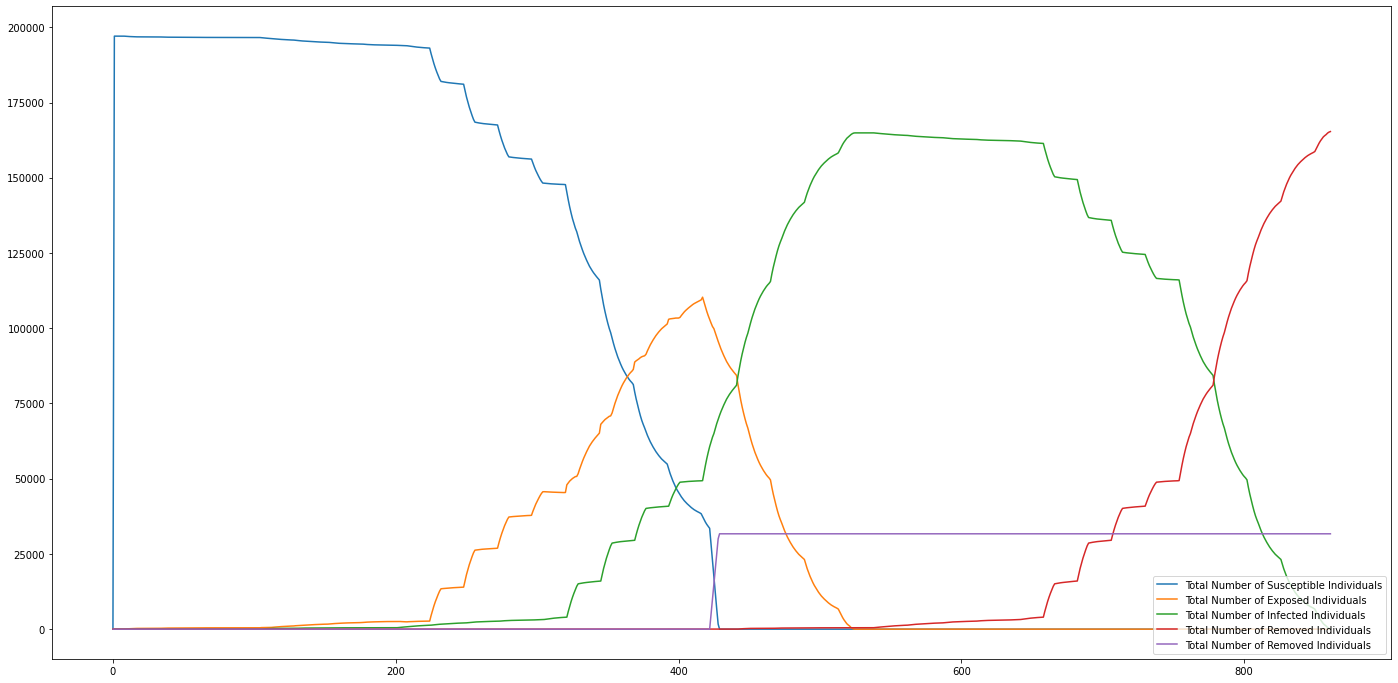

In [8]:
#fig = plt.figure()
plt.plot(range(0, max_size), all_df["susceptible"], label="Total Number of Susceptible Individuals")
plt.plot(range(0, max_size), all_df["exposed"], label="Total Number of Exposed Individuals")
plt.plot(range(0, max_size), all_df["infected"], label="Total Number of Infected Individuals")
plt.plot(range(0, max_size), all_df["removed"], label="Total Number of Removed Individuals")
plt.plot(range(0, max_size), all_df["vaccinated"], label="Total Number of Removed Individuals")

plt.legend(loc="lower right")

<AxesSubplot:>

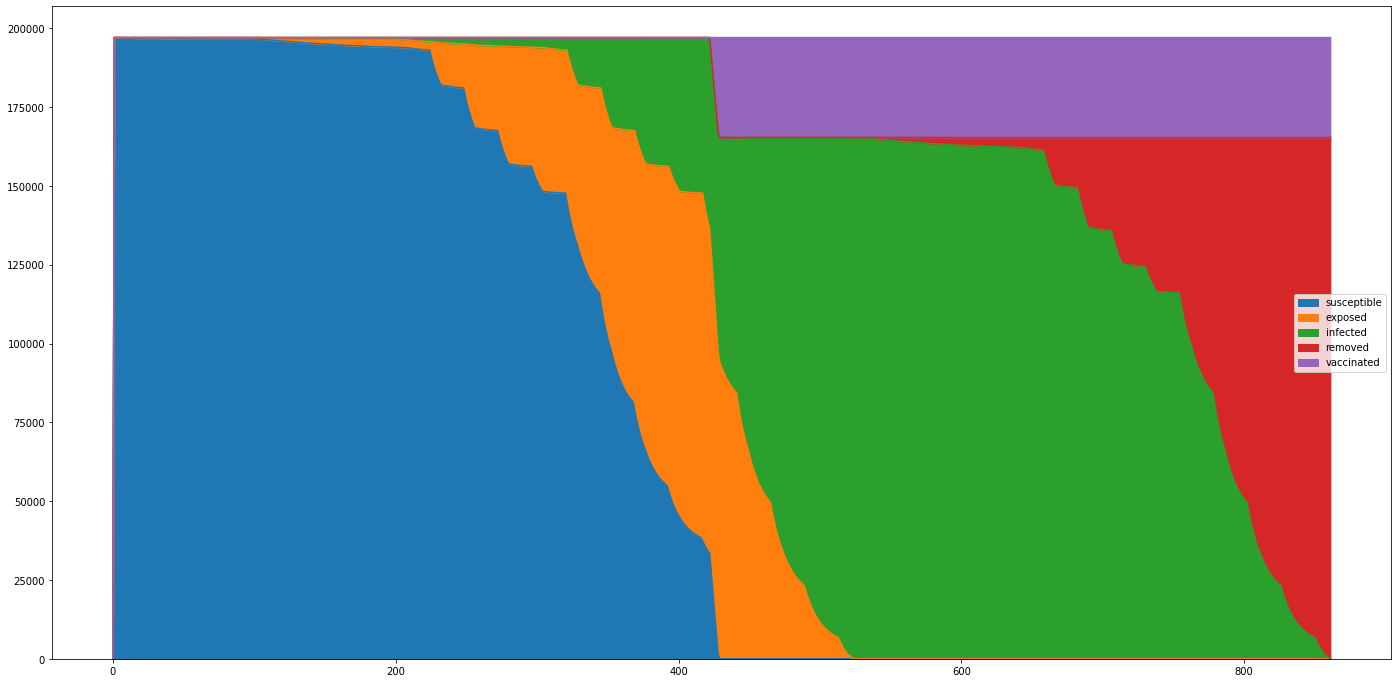

In [9]:
all_df.plot.area()
#plt.stackplot(range(0, max_size), all_df, labels=all_df.keys())
#plt.legend(loc="lower right")

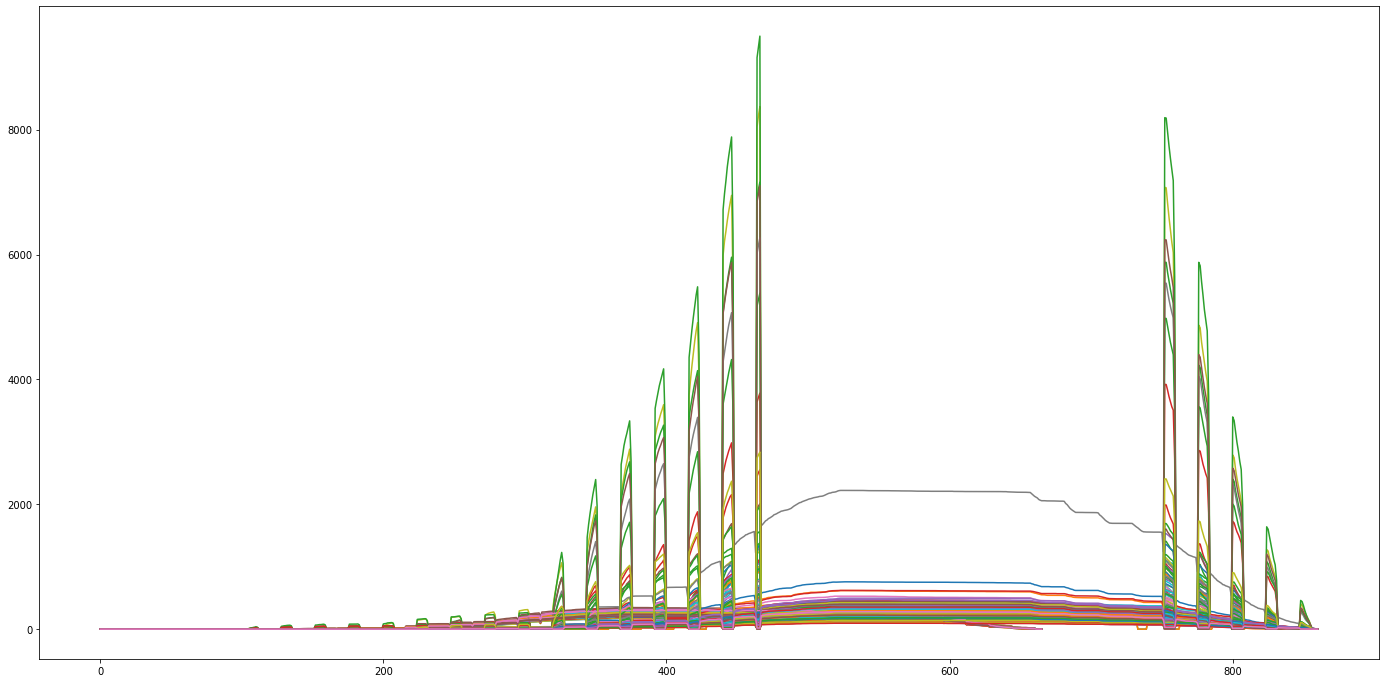

In [29]:

for code in output_area_df["code"].unique():
    plt.plot(output_area_df[output_area_df["code"]==code]["infected"],label=code)

Text(0.5, 1.0, 'Top 10 areas with the most cases')

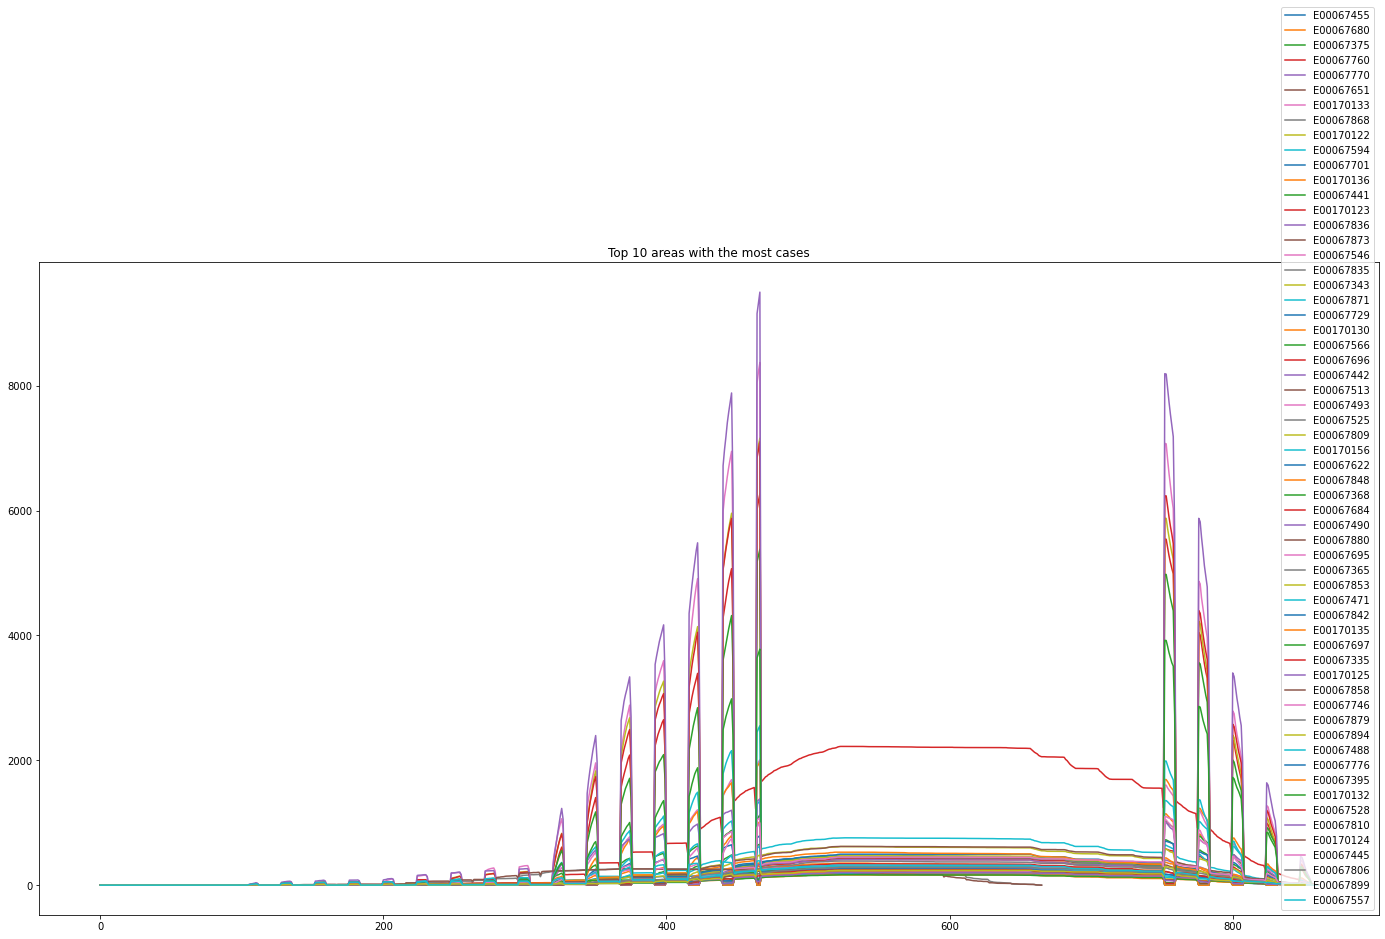

In [46]:
highest_codes=set()
for step in output_area_df["time_step"].unique():
    rows = output_area_df.loc[output_area_df["time_step"] == step]
    top_5=np.argpartition(rows["infected"],-5)[-5:]
    for row_index in top_5:
        row=rows.iloc[row_index]
        area=row["code"]
        highest_codes.add(area)
#print(highest_areas)
#print(highest_codes)
for code in highest_codes:
     plt.plot(output_area_df[output_area_df["code"]==code]["infected"],label=code)
plt.legend(loc="lower right")
plt.title("Top areas areas with the most cases")


Text(0.5, 1.0, 'Max Infected Cases Per Output Area')

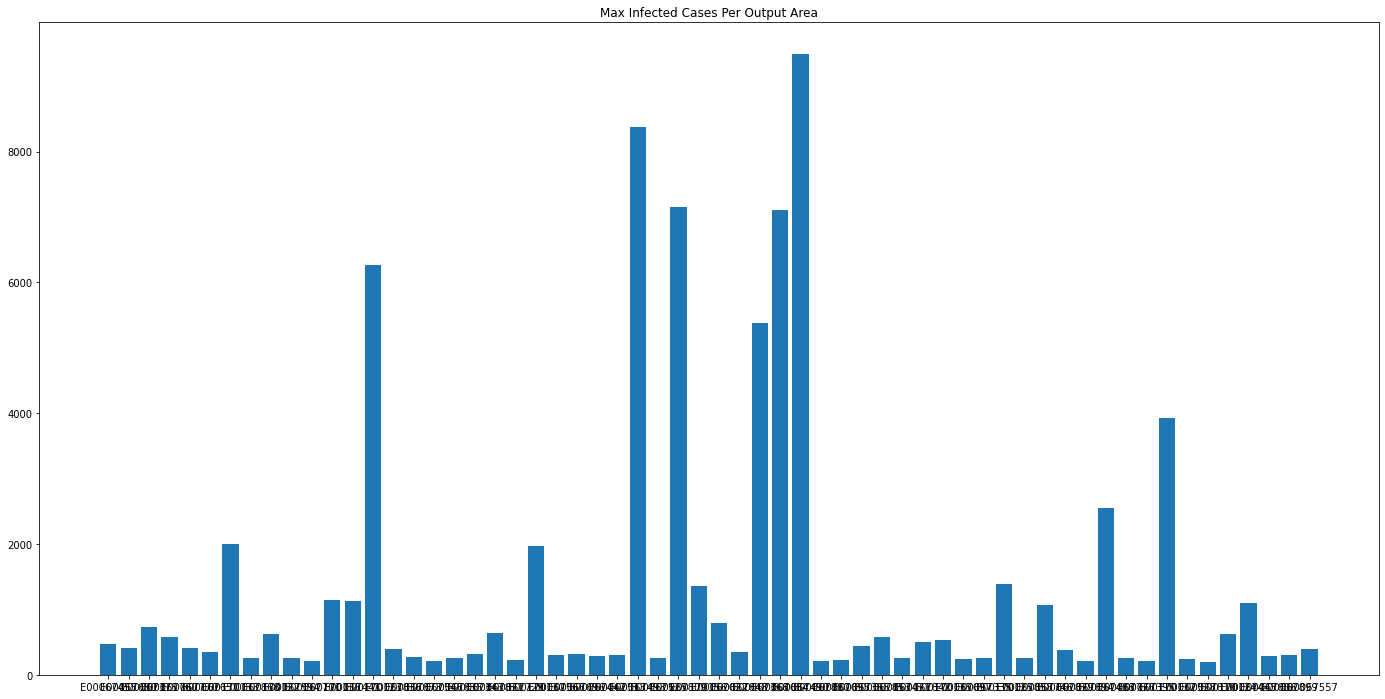

In [47]:
data=[]

for code in highest_codes:
    data.append(output_area_df[output_area_df["code"]==code]["infected"].max())
plt.bar(list(highest_codes),data)
plt.title("Max Infected Cases Per Output Area")
#plt.legend(loc="lower right")



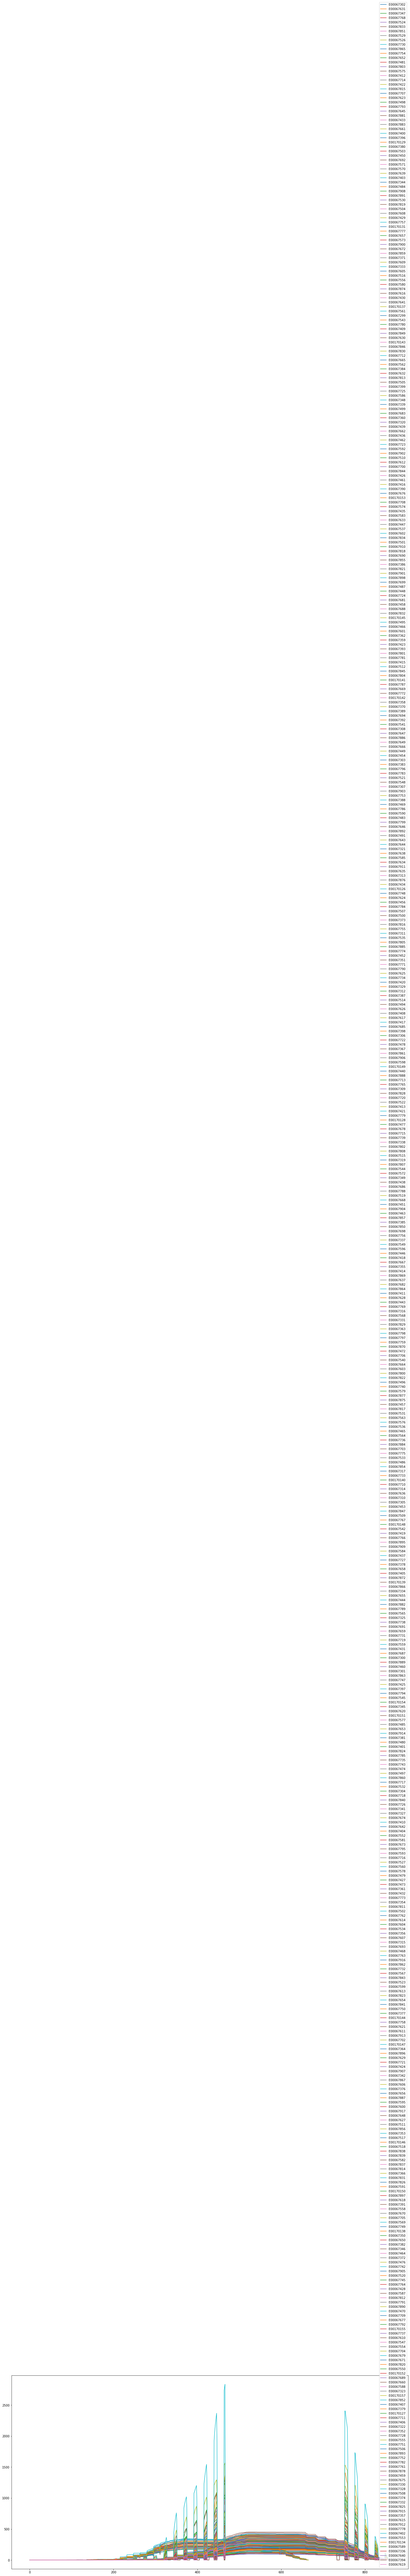

In [48]:

for code in output_area_df["code"].unique():
    if code not in highest_codes:
        plt.plot(output_area_df[output_area_df["code"]==code]["infected"],label=code)
plt.legend(loc="lower right")

In [50]:
from matplotlib.collections import PatchCollection
from matplotlib.patches import Polygon
import shapefile as shp  # Requires the pyshp package
import matplotlib.pyplot as plt
from matplotlib import cm

sf = shp.Reader("../../data/census_map_areas/England_oa_2011/england_oa_2011.shp")

output_area_polygons = {}
for shape in sf.shapeRecords():
    code = shape.record.as_dict(date_strings=True)["code"]
    if code in output_areas:
        points = shape.shape.points[:]
        output_area_polygons[code] = Polygon(points, closed=True)

Building graph for  infected  at index:  None
[-0.6723126358239528, -0.6978272002592478, -0.6461121637150926, -0.7587699644845547, -0.6642880896795381, -0.6517675807607289, -0.6711635357704601, -0.7166708319483586, -0.7107557148433575, -0.6803820657998387, -0.7249929525001303, -0.6792265230541296, -0.744197163397282, -0.6850135145314845, -0.6642880896795381, -0.6104331882372743, -0.7001692381776295, -0.6337477363004362, -0.3501546476939895, -0.6371093573341398, -0.6517675807607289, -0.7178567712185016, -0.5745406952346448, -0.6919886854478224, -0.584241333477502, -0.6642880896795381, -0.8122322529539752, -0.6931544996857172, -0.6237096166629486, -0.6115349027168464, -0.6438561897747247, -0.6326289343514706, -0.3510744405468788, -0.6723126358239528, -0.7563309190331374, -0.6654317243338671, -0.7393720918733016, -0.4709287001708889, -0.6404788295724047, -0.6677217169430706, -0.5983695334152596, -0.584241333477502, -0.6506347224057867, 0.19912264201360094, -0.6908238125214856, -0.59183162

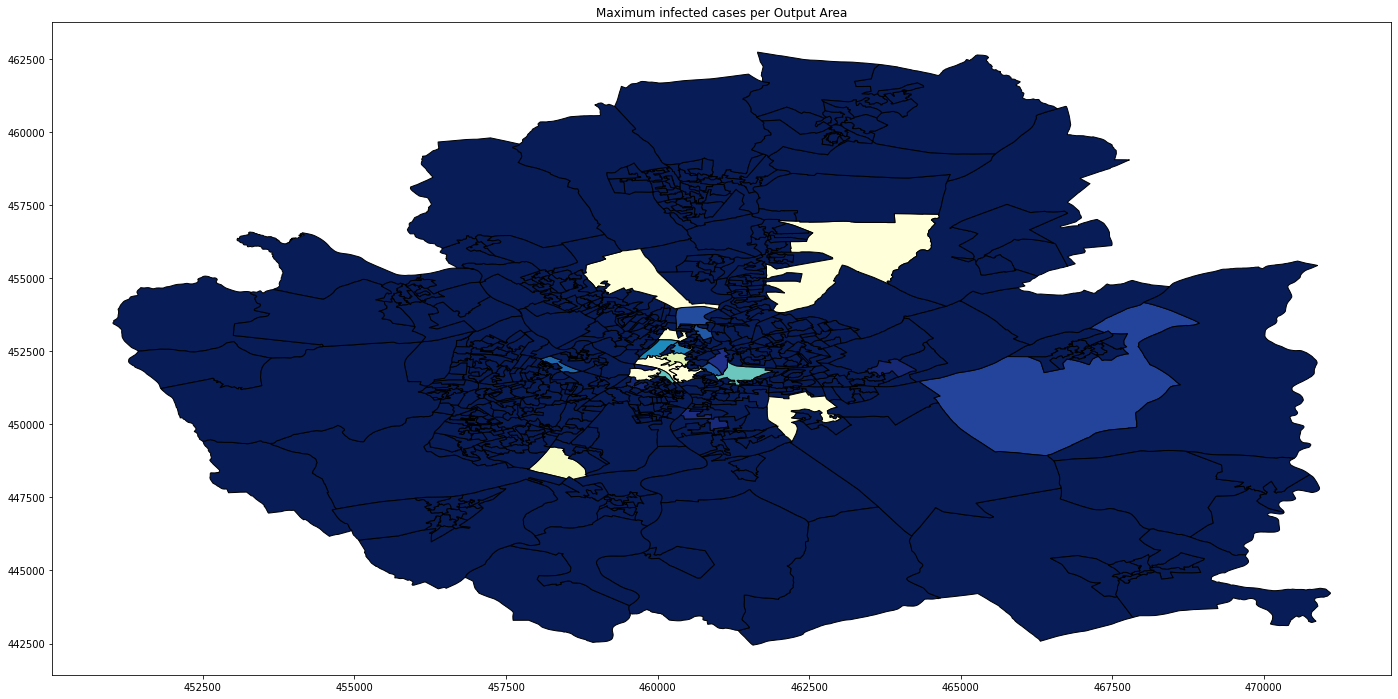

In [59]:

import math
MAX_INFECTED_VALUE = 2000
MIN_INFECTED_VALUE = 0
LOG_BASE = 2


def output_area_heatmap(value, time_step=None, ax=None):
    if time_step is not None:
        time_step = int(time_step)
    print("Building graph for ", value, " at index: ", str(time_step))
    max = output_area_df[value].max()
    min = output_area_df[value].max()
    cmap = cm.get_cmap("YlGnBu").reversed()
    patches = []
    plt.figure()
    poly_colors = []

    for (code, poly) in output_area_polygons.items():
        if time_step is None:
            #colour_ranking = output_area_df.loc[output_area_df["code"] == code][value].max()
            colour_ranking = math.log(0.5 + (
                    output_area_df.loc[output_area_df["code"] == code][
                    value].max() / MAX_INFECTED_VALUE), 2)
        else:
            colour_ranking = math.log((1 / LOG_BASE) + (
                    output_area_df.loc[(output_area_df["time_step"] == time_step) & (
                            output_area_df["code"] == code)][
                    value] / MAX_INFECTED_VALUE), LOG_BASE)
            #colour_ranking =output_area_df.loc[(output_area_df["time_step"] == time_step) & (output_area_df["code"] == code)][value]
            #colour_ranking=output_area_df.loc[output_area_df["code"]==code and output_area_df["time_step"==index]][value]
        patches.append(poly)
        poly_colors.append(colour_ranking)
    collection = PatchCollection(patches, edgecolors="black")
    print(poly_colors)
    if ax is None:
        ax = plt.gca()
    #fig,ax=plt.subplots()
    ax.add_collection(collection)
    ax.autoscale()
    colors = cmap(poly_colors)
    collection.set_facecolor(colors)
    #ax.colorbar(collection,label="Infected cases")
    ax.set_title("Hour")
    collection.set_clim([min, max])

    if time_step is None:
        ax.set_title(str("Maximum " + str(value) + " cases per Output Area"))
    else:
        ax.set_title(str(str(value) + " cases at time step" + str(time_step) + " per Output Area"))
    #plt.show()


output_area_heatmap("infected")

In [ ]:
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets


def output_area_case_slider(x):
    output_area_heatmap("infected", time_step=int(x))
    plt.show()
    return x


plot = interact(output_area_case_slider, x=output_area_df.time_step.max() / 2)
plot

interactive(children=(FloatSlider(value=430.5, description='x', max=1291.5, min=-430.5), Output()), _dom_class…

<function __main__.output_area_case_slider(x)>

0 0
Building graph for  infected  at index:  1
0 1
Building graph for  infected  at index:  58


/home/sam/.local/lib/python3.9/site-packages/matplotlib/colors.py:614: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  mask_bad = X.mask if np.ma.is_masked(X) else np.isnan(X)  # Mask nan's.


TypeError: ufunc 'isnan' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

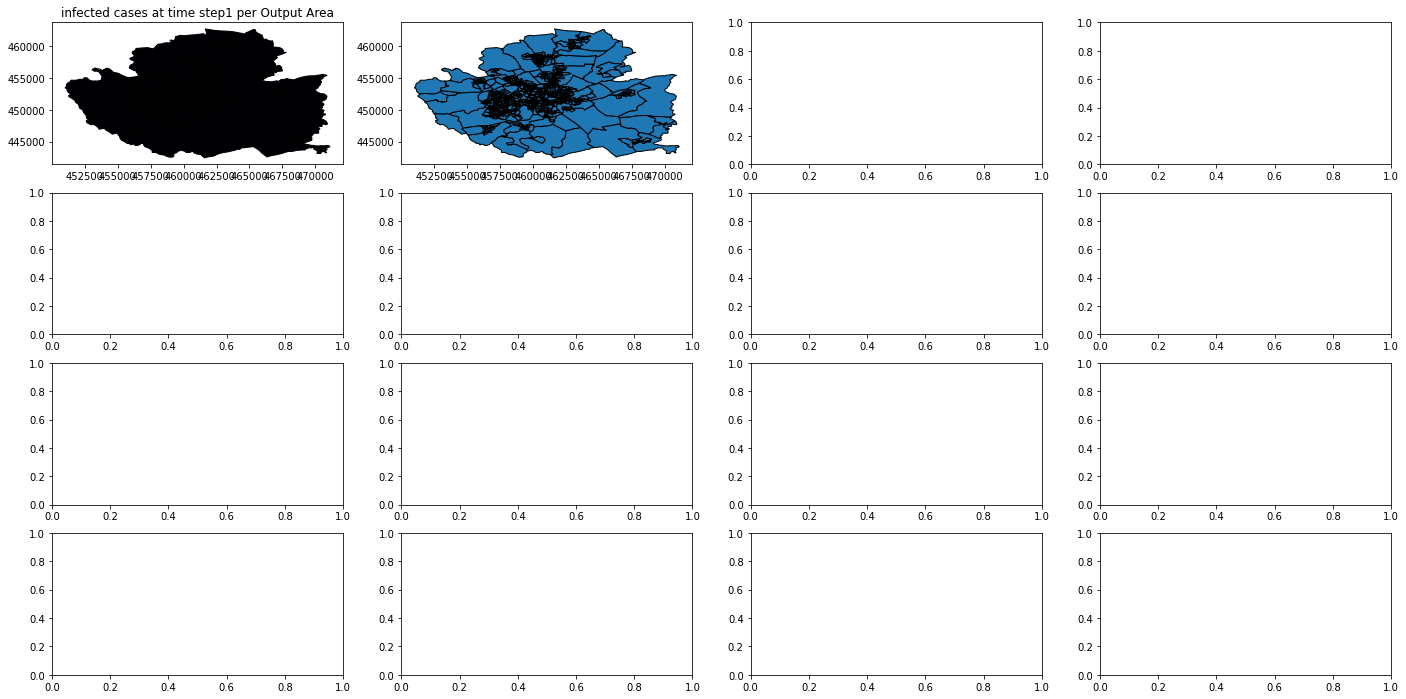

<Figure size 1728x864 with 0 Axes>

<Figure size 1728x864 with 0 Axes>

In [32]:
selected_hours = np.linspace(output_area_df.time_step.min(), output_area_df.time_step.max(), num=16)
fig, axes = plt.subplots(4, 4)
for x in range(0, 4):
    for y in range(0, 4):
        print(x, y)
        hour = selected_hours[(x * 4) + y]
        output_area_heatmap("infected", time_step=hour, ax=axes[x][y])
fig.show()
plt.show()
# and "time_step"==10)

In [62]:
import pandas
occupation=pandas.read_csv("../../data/tables/1254162148...1254162748,1254262205...1254262240/ks608uk_occupation_count_NM_1518_1.csv")
occupation.head()

classes=list(occupation["CELL_NAME"].unique())
classes

['All categories: Occupation',
 '1. Managers, directors and senior officials',
 '2. Professional occupations',
 '3. Associate professional and technical occupations',
 '4. Administrative and secretarial occupations',
 '5. Skilled trades occupations',
 '6. Caring, leisure and other service occupations',
 '7. Sales and customer service occupations',
 '8. Process plant and machine operatives',
 '9. Elementary occupations']

('Professional occupations', 'Associate professional and technical occupations', 'Elementary occupations', 'Managers, directors and senior officials', 'Administrative and secretarial occupations', 'Sales and customer service occupations', 'Skilled trades occupations', 'Caring, leisure and other service occupations', 'Process plant and machine operatives')
(32532.300000000003, 19451.6, 19081.1, 17049.6, 16951.8, 16764.1, 16389.9, 14878.399999999998, 9320.2)


([0, 1, 2, 3, 4, 5, 6, 7, 8],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

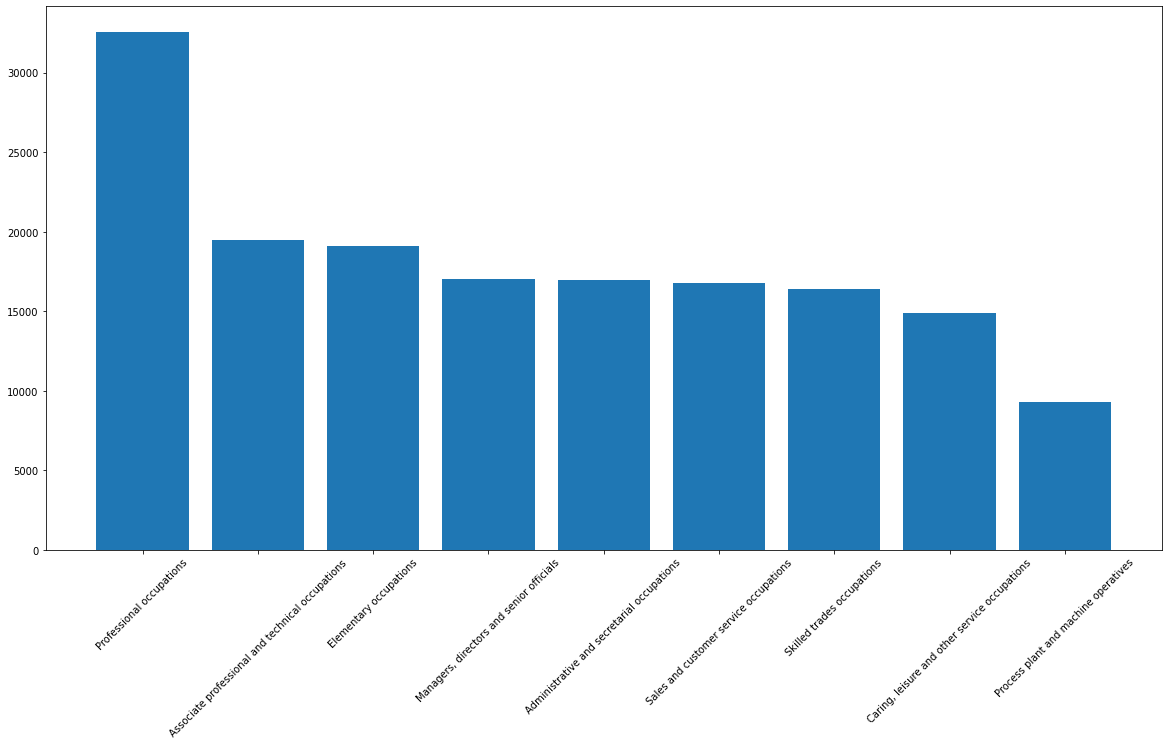

In [86]:
selected=classes[0]
counts=[]
index=0
fig,ax=plt.subplots(1,1,figsize=(20,10))
for selected in classes:
    index+=1
    if index==1:
        continue

    data=occupation.loc[occupation["CELL_NAME"]==selected]
    counts.append((selected[3:],data["OBS_VALUE"].sum()))

counts=sorted(counts,key=lambda x:x[1],reverse=True)
x,y=zip(*counts)
print(x)
print(y)
ax.bar(x,y)
plt.xticks(rotation=45)